In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
seven_balls = pd.read_csv('/Users/abhayanandtripathi/Downloads/7balls.csv').T
coins_data = pd.read_csv('/Users/abhayanandtripathi/Downloads/coinsdata.csv').T
dices_data = pd.read_csv('/Users/abhayanandtripathi/Downloads/dice_train.csv')

In [19]:
seven_balls

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first,red,black,red,red,black,black,red,black,black,red,...,red,red,blue,red,black,red,yellow,blue,blue,blue
second,black,red,black,black,red,yellow,red,red,blue,blue,...,red,blue,red,blue,red,blue,blue,red,red,red
third,blue,blue,red,blue,blue,blue,blue,yellow,blue,red,...,blue,red,blue,yellow,blue,blue,blue,black,black,red
fourth,red,red,yellow,blue,blue,red,blue,blue,yellow,red,...,yellow,red,black,black,blue,yellow,red,red,red,yellow
fifth,blue,red,blue,yellow,red,blue,red,blue,red,black,...,black,black,yellow,blue,yellow,red,red,blue,yellow,black
sixth,yellow,blue,blue,red,red,red,black,red,red,blue,...,red,blue,red,red,red,red,black,yellow,red,red
seventh,red,yellow,red,red,yellow,red,yellow,red,red,yellow,...,blue,yellow,red,red,red,black,red,red,blue,blue


In [20]:
coins_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first_flip,Head,Tail,Head,Head,Tail,Head,Tail,Head,Head,Tail,...,Tail,Tail,Head,Tail,Tail,Tail,Head,Tail,Tail,Tail
second_flip,Tail,Head,Tail,Head,Tail,Head,Head,Tail,Tail,Head,...,Head,Tail,Tail,Head,Head,Head,Tail,Tail,Tail,Head
third_flip,Tail,Head,Head,Head,Head,Head,Tail,Head,Tail,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Head,Head
fourth_flip,Tail,Tail,Head,Head,Tail,Tail,Tail,Tail,Head,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Tail,Head
fifth_flip,Head,Tail,Tail,Head,Head,Tail,Tail,Tail,Head,Head,...,Tail,Tail,Tail,Tail,Head,Tail,Head,Head,Tail,Tail


In [7]:
dices_data

,Id,isTruthful,try0,try1,try2,try3,try4,try5,try6,try7,...,try990,try991,try992,try993,try994,try995,try996,try997,try998,try999
0,0,0,2,2,5,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,0,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
2,2,1,4,5,4,5,6,3,4,3,...,2,6,6,1,4,3,4,1,3,2
3,3,0,3,3,4,3,3,3,3,3,...,3,3,3,1,3,3,3,3,3,3
4,4,0,6,6,6,6,2,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1993,0,5,6,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1994,1994,0,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1995,1995,1,5,1,1,2,4,5,2,4,...,5,4,3,3,6,2,2,6,5,4
1996,1996,1,1,4,2,5,2,6,6,5,...,1,3,6,6,1,6,4,2,3,1


In [21]:
seven_balls

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first,red,black,red,red,black,black,red,black,black,red,...,red,red,blue,red,black,red,yellow,blue,blue,blue
second,black,red,black,black,red,yellow,red,red,blue,blue,...,red,blue,red,blue,red,blue,blue,red,red,red
third,blue,blue,red,blue,blue,blue,blue,yellow,blue,red,...,blue,red,blue,yellow,blue,blue,blue,black,black,red
fourth,red,red,yellow,blue,blue,red,blue,blue,yellow,red,...,yellow,red,black,black,blue,yellow,red,red,red,yellow
fifth,blue,red,blue,yellow,red,blue,red,blue,red,black,...,black,black,yellow,blue,yellow,red,red,blue,yellow,black
sixth,yellow,blue,blue,red,red,red,black,red,red,blue,...,red,blue,red,red,red,red,black,yellow,red,red
seventh,red,yellow,red,red,yellow,red,yellow,red,red,yellow,...,blue,yellow,red,red,red,black,red,red,blue,blue


In [23]:
for i in range(10):
    seven_balls[i] = LabelEncoder().fit_transform(seven_balls[i])
seven_balls

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first,2,0,2,2,0,0,2,0,0,2,...,red,red,blue,red,black,red,yellow,blue,blue,blue
second,0,2,0,0,2,3,2,2,1,1,...,red,blue,red,blue,red,blue,blue,red,red,red
third,1,1,2,1,1,1,1,3,1,2,...,blue,red,blue,yellow,blue,blue,blue,black,black,red
fourth,2,2,3,1,1,2,1,1,3,2,...,yellow,red,black,black,blue,yellow,red,red,red,yellow
fifth,1,2,1,3,2,1,2,1,2,0,...,black,black,yellow,blue,yellow,red,red,blue,yellow,black
sixth,3,1,1,2,2,2,0,2,2,1,...,red,blue,red,red,red,red,black,yellow,red,red
seventh,2,3,2,2,3,2,3,2,2,3,...,blue,yellow,red,red,red,black,red,red,blue,blue


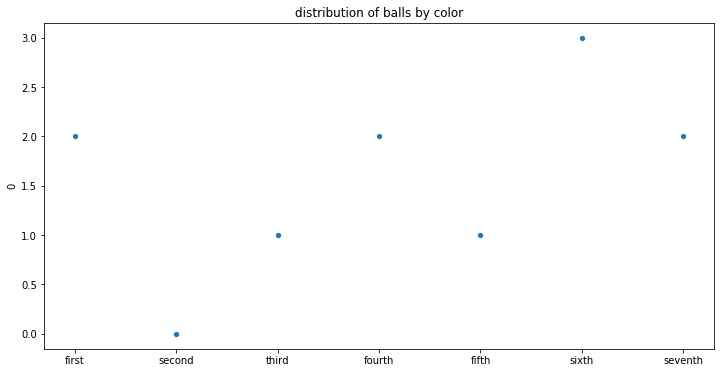

In [24]:
plt.figure(figsize=(12,6))
plt.title('distribution of balls by color')
plt.ylabel('ball color (follow legend)')
sns.scatterplot(x = seven_balls.index, y = seven_balls[0])

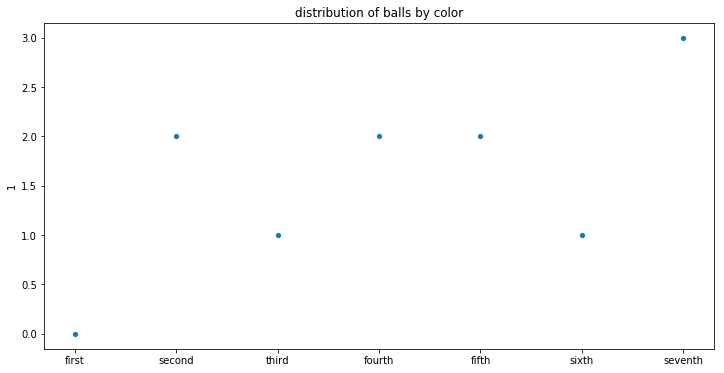

In [25]:
plt.figure(figsize=(12,6))
plt.title('distribution of balls by color')
plt.ylabel('ball color (follow legend)')
sns.scatterplot(x = seven_balls.index, y = seven_balls[1])

In [26]:
coins_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first_flip,Head,Tail,Head,Head,Tail,Head,Tail,Head,Head,Tail,...,Tail,Tail,Head,Tail,Tail,Tail,Head,Tail,Tail,Tail
second_flip,Tail,Head,Tail,Head,Tail,Head,Head,Tail,Tail,Head,...,Head,Tail,Tail,Head,Head,Head,Tail,Tail,Tail,Head
third_flip,Tail,Head,Head,Head,Head,Head,Tail,Head,Tail,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Head,Head
fourth_flip,Tail,Tail,Head,Head,Tail,Tail,Tail,Tail,Head,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Tail,Head
fifth_flip,Head,Tail,Tail,Head,Head,Tail,Tail,Tail,Head,Head,...,Tail,Tail,Tail,Tail,Head,Tail,Head,Head,Tail,Tail


In [27]:
for i in range(10):
    coins_data[i] = LabelEncoder().fit_transform(coins_data[i])
coins_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first_flip,0,1,0,0,1,0,1,0,0,1,...,Tail,Tail,Head,Tail,Tail,Tail,Head,Tail,Tail,Tail
second_flip,1,0,1,0,1,0,0,1,1,0,...,Head,Tail,Tail,Head,Head,Head,Tail,Tail,Tail,Head
third_flip,1,0,0,0,0,0,1,0,1,1,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Head,Head
fourth_flip,1,1,0,0,1,1,1,1,0,1,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Tail,Head
fifth_flip,0,1,1,0,0,1,1,1,0,0,...,Tail,Tail,Tail,Tail,Head,Tail,Head,Head,Tail,Tail


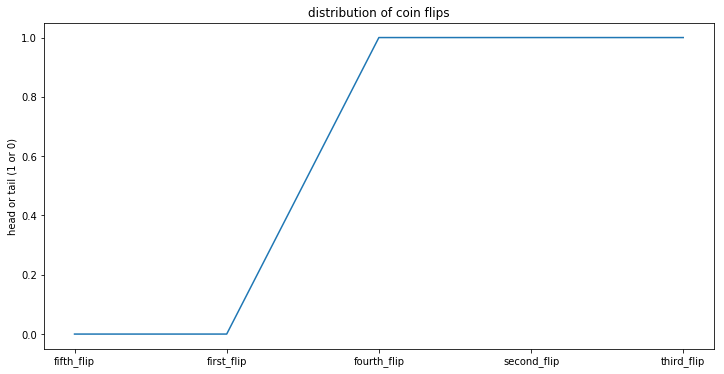

In [30]:
plt.figure(figsize = (12,6))
plt.title('distribution of coin flips')
plt.ylabel('head or tail (1 or 0)')
sns.lineplot(data = coins_data[0])

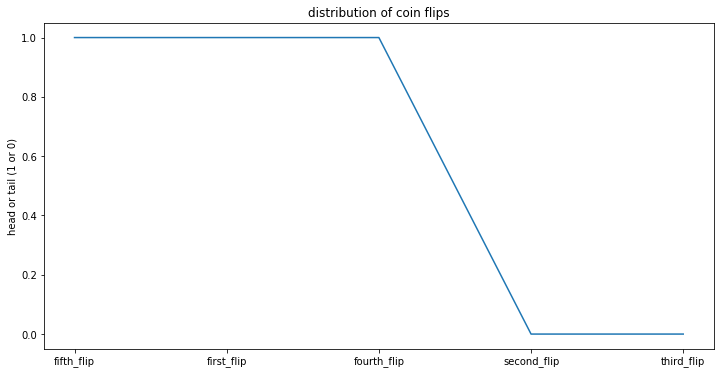

In [31]:
plt.figure(figsize = (12,6))
plt.title('distribution of coin flips')
plt.ylabel('head or tail (1 or 0)')
sns.lineplot(data = coins_data[1])

In [34]:
dices_data = dices_data.T

In [35]:
dices_data

,0,1,2,3,4,5,6,7,8,9,...,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
Id,0,1,2,3,4,5,6,7,8,9,...,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
isTruthful,0,0,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,1,0
try0,2,3,4,3,6,4,1,1,1,4,...,5,3,6,5,3,5,2,5,1,6
try1,2,3,5,3,6,2,1,1,1,4,...,1,3,6,3,3,6,1,1,4,6
try2,5,3,4,4,6,2,3,1,5,4,...,1,3,6,5,3,5,2,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
try995,2,3,3,3,6,3,1,1,1,4,...,5,2,6,1,3,5,2,2,6,6
try996,2,3,4,3,6,6,1,1,6,4,...,2,5,6,6,3,5,2,2,4,6
try997,2,3,1,3,6,1,1,1,1,4,...,1,5,6,3,3,5,2,6,2,6
try998,2,3,3,3,6,5,1,1,4,1,...,6,3,6,2,3,5,2,5,3,6


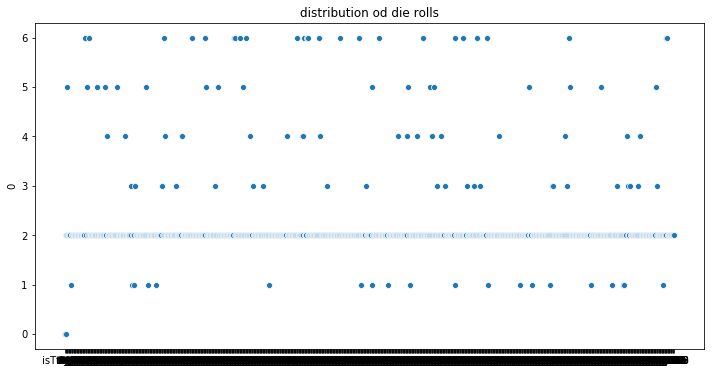

In [36]:
plt.figure(figsize = (12,6))
plt.title('distribution od die rolls')
plt.ylabel('die outcome')
sns.scatterplot(x = dices_data.index, y = dices_data[0])